# Finding the Healthiest Pittsburgh Neighborhood to Live In

**By: Stella Bailey, Lukas Finn, and Hafsah Shahzad**

![safety](https://media.giphy.com/media/xT5LMBc1W9lVSheDnO/giphy.gif)

In order to find the 'healthiest' neighborhood in Pittsburgh, we looked at three different data sets. One of our data sets looks at the average age that people die in each neigbhorhood, another looks at the number of overdose deaths in each neighborhood, and our third data set looks at the amount of lead found in blood samples from specific school districts.

We decided that the best neighborhood should be the one with the highest average age at death, since they would live the longest there; as well as have the least amount of overdose deaths; and the lowest amount of blood levels. The second two metrics are more specific causes of death or 'unhealthiness' while the first is just showing the generalized data.

## Stella's Notebook: Average Age at Death

For my data set, I am analyzing the median age that people die in each Allegheny County neighborhood. Obviously, there are a lot of unforseen factors when determining when someone dies, but it is still a good metric to analyze the overall health and well-being of the population in each neighborhood.


Link: https://data.wprdc.org/dataset/median-age-death/resource/c2e1500a-a12a-4e91-be94-76c6a892b7e2

#### Importing everything:
*this does not need to be done again for the other group member's sections.*

In [1]:
import pandas as pd
import geopandas as gp
%matplotlib inline

#### Importing my data set:
*here I am importing my data as well as giving a visualization of what it looks like*

As you can see below, there are many subsections to the data as it breaks it down by race, however when I am analyzing my results, I only look at the last column which shows the median age. Also, you can see there is a column which shows the Total Deaths that are being recorded for this data set, this will be important later because the neighborhoods that have more data collected will obviously be more accurate representations.

In [3]:
# Importing my data set & showing the first 10 data points in the data set
data = pd.read_csv("avgDeathData.csv", index_col = "Neighborhood")
data.head(10)

,BLACKdeaths,Black MD AGE AT DEATH,WHITEdeaths,White MD AGE AT DEATH,TOTALdeaths*,TOTAL MD AGE AT DEATH
Neighborhood,,,,,,
South Shore,0,0.0,0,0.0,0,0.0
Chateau,0,0.0,2,NaN,2,NaN
North Shore,0,0.0,4,NaN,5,80.0
Allegheny West,3,NaN,4,NaN,8,65.0
Saint Clair,5,67.5,5,67.5,10,67.5
West End,5,76.7,9,78.0,14,77.5
Esplen,3,NaN,13,72.5,16,71.7
Arlington Heights,10,55.0,7,72.5,17,63.7
Strip District,7,76.7,12,70.0,19,72.5


To help visualize all of the data in my dataset, I have included a scatterplot below. From looking at the scatterplot, you can see that most of the median ages at death recorded fall somewhere around 70-80 years which is a good start; however, most of the data collected for each neighbhorhood has a sample size under about 300, though there are ones with more than 300 which may prove to be more reliable data.

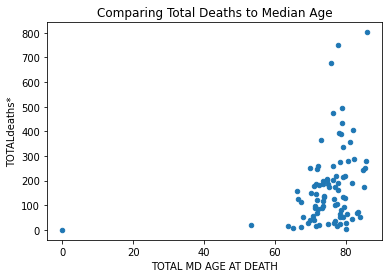

In [5]:
data.plot(kind='scatter', x = 'TOTAL MD AGE AT DEATH', y = 'TOTALdeaths*', title = 'Comparing Total Deaths to Median Age')

Next, I have also produced a map that shows the data better based on geographic location, though it is missing the actual neighbhorhood names. I would say that though there is not a clear pattern, there are pockets of neighbhorhoods where the data points are significantly higher, so the color is darker, than some other points. Also note that the greyed out sections are ones that had no data.

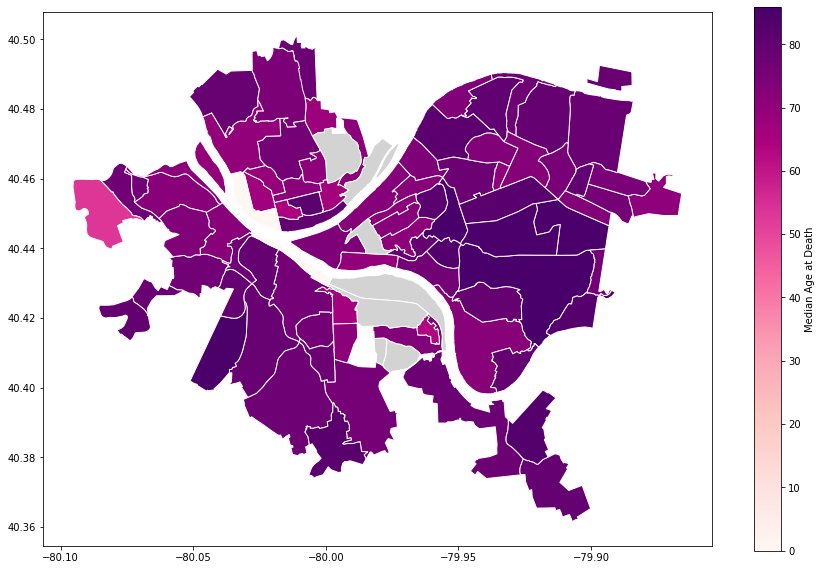

In [8]:
neighborhoods = gp.read_file("Neighborhoods/Neighborhoods_.shp")
numDeaths = data.groupby("Neighborhood").sum()['TOTAL MD AGE AT DEATH']
dataMap = neighborhoods.merge(numDeaths, how='left', left_on='hood', right_on='Neighborhood')
dataMap.plot(column='TOTAL MD AGE AT DEATH',
            cmap='RdPu',
            edgecolor='white',
            legend=True,
            legend_kwds={'label': "Median Age at Death"},
            figsize=(15,10),
            missing_kwds={'color': 'lightgrey'}
            )

In [18]:
print("Top Neighbhorhoods Based on the Age at Death:")
print()
print(numDeaths.sort_values(ascending=False).head(10))

print()
print()
print()
print("Neighborhoods With the Most Amount of Data Entries:")
print()
numEntries = data.groupby("Neighborhood").sum()['TOTALdeaths*']
print(numEntries.sort_values(ascending=False).head(10))


Top Neighbhorhoods Based on the Age at Death:

Neighborhood
Squirrel Hill South    85.9
North Oakland          85.6
Banksville             85.5
Point Breeze           85.1
Squirrel Hill North    85.0
Central Oakland        84.0
New Homestead          83.4
Swisshelm Park         83.1
Overbrook              82.2
Shadyside              82.1
Name: TOTAL MD AGE AT DEATH, dtype: float64



Neighborhoods With the Most Amount of Data Entries:

Neighborhood
Squirrel Hill South         802
Brookline                   750
Carrick                     678
Brighton Heights            496
Mount Washington            476
Beechview                   434
Shadyside                   406
Bloomfield                  394
Lincoln-Lemington-Belmar    389
East Liberty                364
Name: TOTALdeaths*, dtype: int64


#### In conclusion:
From my data set it can be seen that the neighborhoods listed above are the ones with the highest average ages at death, and I have also printed out the ones that had the most data entries. Clearly, Squirrel Hill South has the most entries as well as the highest average age, so that result should be the most reliable. Note that all of the other neighbhorhoods with higher median ages at death do not appear in the list of the neighborhoods with the most data entries, so those results might be less reliable.